# Week 2 Data exploration
## Hollis Potts
The purpose of this assignment is to explore petroleum refinery locations in the United States.

In [1]:
import pandas as pd 
import geopandas as gpd

In [18]:
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: /home/jovyan/up221-hollis/Week 2 data exploration


In [20]:
# read and add file to notebook
petro = gpd.read_file('data/petroleum.geojson')

In [21]:
type(petro)

geopandas.geodataframe.GeoDataFrame

In [22]:
petro.head()

,OBJECTID,site_id,Company,Corp,Site,State,PADD,AD_Mbpd,Vdist_Mbpd,CaDis_Mbpd,...,Isal_Mbpd,HDS_Mbpd,Cokin_Mbpd,Asph_Mbpd,Source,Period,Latitude,Longitude,Link_Imports,geometry
0,262,83,TOTALENERGIES PETROCHEM & REFG USA,TOTALENERGIES SE,PORT ARTHUR,Texas,3,245.0,117.0,80.0,...,15.3,274.5,60.0,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",29.960460,-93.888470,1.0,POINT (-93.88847 29.96046)
1,263,84,ALON USA ENERGY INC,DELEK GROUP LTD,BIG SPRING,Texas,3,74.0,28.0,23.5,...,5.0,60.8,0.0,7.6,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",32.270992,-101.415073,NaN,POINT (-101.41507 32.27099)
2,264,87,MARATHON PETROLEUM CO LP,MARATHON PETROLEUM CORP,CATLETTSBURG,Kentucky,2,316.0,134.0,109.0,...,44.0,281.5,0.0,35.4,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",38.376602,-82.596408,NaN,POINT (-82.59641 38.3766)
3,265,89,MARATHON PETROLEUM CO LP,MARATHON PETROLEUM CORP,CANTON,Ohio,2,105.0,35.0,24.0,...,8.5,98.0,0.0,17.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",40.772929,-81.413878,NaN,POINT (-81.41388 40.77293)
4,266,92,ST PAUL PARK REFINING CO LLC,MARATHON PETROLEUM CORP,SAINT PAUL,Minnesota,2,111.0,51.0,33.5,...,22.5,98.0,0.0,19.5,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",44.851007,-92.994345,1.0,POINT (-92.99435 44.85101)


In [23]:
# checking data types
petro.dtypes

OBJECTID           int32
site_id            int32
Company           object
Corp              object
Site              object
State             object
PADD               int32
AD_Mbpd          float64
Vdist_Mbpd       float64
CaDis_Mbpd       float64
HyCrk_Mbpd       float64
VRedu_Mbpd         int32
CaRef_Mbpd       float64
Isal_Mbpd        float64
HDS_Mbpd         float64
Cokin_Mbpd       float64
Asph_Mbpd        float64
Source            object
Period            object
Latitude         float64
Longitude        float64
Link_Imports     float64
geometry        geometry
dtype: object

In [25]:
# I think I am just interested in sites and their locations at this point, although company information might be interesting with additional research.

In [26]:
petro.shape

(132, 23)

In [27]:
# I am curious about the per state count of petroleum refineries
petro.State.value_counts()

State
Texas            34
Louisiana        15
California       14
Washington        5
Alaska            5
Oklahoma          5
Utah              5
Montana           4
Ohio              4
Illinois          4
Wyoming           4
New Jersey        3
Mississippi       3
Kansas            3
Pennsylvania      3
Alabama           3
Minnesota         2
Colorado          2
Arkansas          2
Indiana           2
New Mexico        1
Kentucky          1
North Dakota      1
West Virginia     1
Wisconsin         1
Tennessee         1
Nevada            1
Hawaii            1
Delaware          1
Michigan          1
Name: count, dtype: int64

In [28]:
state_count = petro.State.value_counts()

In [29]:
state_count

State
Texas            34
Louisiana        15
California       14
Washington        5
Alaska            5
Oklahoma          5
Utah              5
Montana           4
Ohio              4
Illinois          4
Wyoming           4
New Jersey        3
Mississippi       3
Kansas            3
Pennsylvania      3
Alabama           3
Minnesota         2
Colorado          2
Arkansas          2
Indiana           2
New Mexico        1
Kentucky          1
North Dakota      1
West Virginia     1
Wisconsin         1
Tennessee         1
Nevada            1
Hawaii            1
Delaware          1
Michigan          1
Name: count, dtype: int64

In [30]:
petro.Company.value_counts()

Company
PHILLIPS 66 COMPANY                    8
MARATHON PETROLEUM CO LP               6
CHEVRON USA INC                        4
EXXONMOBIL REFINING & SUPPLY CO        4
TESORO REFINING & MARKETING CO         4
                                      ..
HARTREE REFINING LLC                   1
TALLEY ASPHALT PRODUCTS INC            1
TEXAS INTERNATIONAL TERMINALS          1
ENTERPRISE PROD TEXAS OPERATING LLC    1
TARGA DOWNSTREAM LLC                   1
Name: count, Length: 99, dtype: int64

In [31]:
state_count = state_count.reset_index()

In [32]:
state_count

,State,count
0,Texas,34
1,Louisiana,15
2,California,14
3,Washington,5
4,Alaska,5
5,Oklahoma,5
6,Utah,5
7,Montana,4
8,Ohio,4
9,Illinois,4


<Axes: >

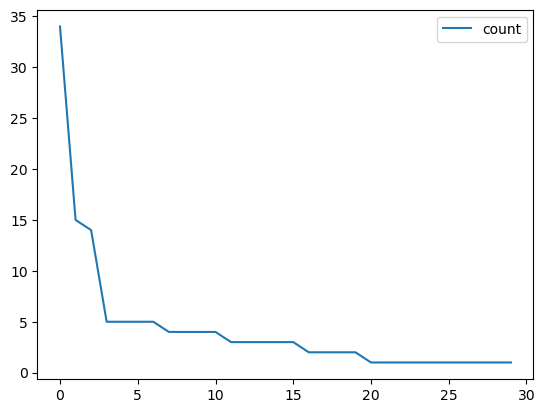

In [33]:
state_count.plot()

In [35]:
# Just messing around here

<Axes: title={'center': 'Number of Petroleum Refineries by State'}, xlabel='State'>

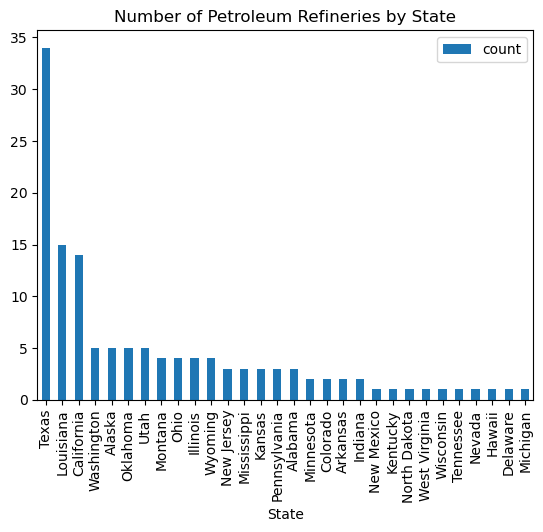

In [36]:
state_count.plot.bar (x= 'State', y = 'count', title = 'Number of Petroleum Refineries by State')

In [37]:
#I am going to clean this up now and try to plot the above info. My goal is to plot for the US as a whole and for Texas, Louisiana, and California individually.

In [38]:
petro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      132 non-null    int32   
 1   site_id       132 non-null    int32   
 2   Company       132 non-null    object  
 3   Corp          132 non-null    object  
 4   Site          132 non-null    object  
 5   State         132 non-null    object  
 6   PADD          132 non-null    int32   
 7   AD_Mbpd       132 non-null    float64 
 8   Vdist_Mbpd    132 non-null    float64 
 9   CaDis_Mbpd    132 non-null    float64 
 10  HyCrk_Mbpd    132 non-null    float64 
 11  VRedu_Mbpd    132 non-null    int32   
 12  CaRef_Mbpd    132 non-null    float64 
 13  Isal_Mbpd     132 non-null    float64 
 14  HDS_Mbpd      132 non-null    float64 
 15  Cokin_Mbpd    132 non-null    float64 
 16  Asph_Mbpd     132 non-null    float64 
 17  Source        132 non-null    object  
 18  Pe

In [39]:
desired_columns = ['Corp','Site','State','Latitude','Longitude','geometry']
petro[desired_columns].sample(5)

,Corp,Site,State,Latitude,Longitude,geometry
86,VALERO ENERGY CORP,SUNRAY,Texas,35.955630,-101.880991,POINT (-101.88099 35.95563)
54,SAN JOAQUIN REFINING CO INC,BAKERSFIELD,California,35.387330,-119.047922,POINT (-119.04792 35.38733)
11,CHS INC,MCPHERSON,Kansas,38.341628,-97.677680,POINT (-97.67768 38.34163)
81,FORELAND REFINING CORP,ELY,Nevada,38.621486,-115.617898,POINT (-115.6179 38.62149)
65,PBF ENERGY CO LLC,TOLEDO,Ohio,41.628890,-83.504920,POINT (-83.50492 41.62889)


In [41]:
petro_trimmed = petro[desired_columns].copy() #creating new copy of data with just the desired columns of info.
petro_trimmed

,Corp,Site,State,Latitude,Longitude,geometry
0,TOTALENERGIES SE,PORT ARTHUR,Texas,29.960460,-93.888470,POINT (-93.88847 29.96046)
1,DELEK GROUP LTD,BIG SPRING,Texas,32.270992,-101.415073,POINT (-101.41507 32.27099)
2,MARATHON PETROLEUM CORP,CATLETTSBURG,Kentucky,38.376602,-82.596408,POINT (-82.59641 38.3766)
3,MARATHON PETROLEUM CORP,CANTON,Ohio,40.772929,-81.413878,POINT (-81.41388 40.77293)
4,MARATHON PETROLEUM CORP,SAINT PAUL,Minnesota,44.851007,-92.994345,POINT (-92.99435 44.85101)
...,...,...,...,...,...,...
127,HARTREE PARTNERS LP,CHANNELVIEW,Texas,29.764600,-95.103000,POINT (-95.103 29.7646)
128,TALLEY ASPHALT PRODUCTS INC,KERN,California,35.144910,-119.427540,POINT (-119.42754 35.14491)
129,TEXAS INTL TERMINALS,GALVESTON,Texas,29.301730,-94.825150,POINT (-94.82515 29.30173)
130,ENTERPRISE PRODUCTS PTNRS LP,MONT BELVIEU,Texas,29.857780,-94.907200,POINT (-94.9072 29.85778)


In [42]:
#exploring further
petro_trimmed[petro_trimmed.State == 'California']

,Corp,Site,State,Latitude,Longitude,geometry
5,MARATHON PETROLEUM CORP,CARSON,California,33.818578,-118.236677,POINT (-118.23668 33.81858)
13,CHEVRON CORP,EL SEGUNDO,California,33.911422,-118.410994,POINT (-118.41099 33.91142)
14,CHEVRON CORP,RICHMOND,California,37.949780,-122.398665,POINT (-122.39867 37.94978)
26,VALERO ENERGY CORP,BENICIA,California,38.072007,-122.138319,POINT (-122.13832 38.07201)
33,VALERO ENERGY CORP,WILMINGTON ASPHALT PLANT,California,33.798301,-118.236861,POINT (-118.23686 33.7983)
34,KERN OIL & REFINING CO,BAKERSFIELD,California,35.294719,-118.917953,POINT (-118.91795 35.29472)
39,VALERO ENERGY CORP,WILMINGTON REFINERY,California,33.779055,-118.233663,POINT (-118.23366 33.77905)
43,PBF ENERGY CO LLC,TORRANCE,California,33.853208,-118.332317,POINT (-118.33232 33.85321)
54,SAN JOAQUIN REFINING CO INC,BAKERSFIELD,California,35.387330,-119.047922,POINT (-119.04792 35.38733)
58,PBF ENERGY CO LLC,MARTINEZ,California,38.019952,-122.111017,POINT (-122.11102 38.01995)


In [43]:
#trying .loc
petro_trimmed.loc[petro_trimmed['State'] == 'Texas']

,Corp,Site,State,Latitude,Longitude,geometry
0,TOTALENERGIES SE,PORT ARTHUR,Texas,29.960460,-93.888470,POINT (-93.88847 29.96046)
1,DELEK GROUP LTD,BIG SPRING,Texas,32.270992,-101.415073,POINT (-101.41507 32.27099)
15,MARATHON PETROLEUM CORP,EL PASO,Texas,31.767512,-106.395613,POINT (-106.39561 31.76751)
18,DELEK GROUP LTD,TYLER,Texas,32.360432,-95.281964,POINT (-95.28196 32.36043)
19,CHEVRON CORP,PASADENA,Texas,29.721442,-95.206799,POINT (-95.2068 29.72144)
21,STARLIGHT RELATIVITY ACQUISITION CO,SAN ANTONIO,Texas,29.347637,-98.459995,POINT (-98.45999 29.34764)
25,EXXON MOBIL CORP,BAYTOWN,Texas,29.761431,-94.976798,POINT (-94.9768 29.76143)
36,KOCH INDUSTRIES INC,CORPUS CHRISTI WEST,Texas,27.832974,-97.525965,POINT (-97.52596 27.83297)
37,KOCH INDUSTRIES INC,CORPUS CHRISTI EAST,Texas,27.804365,-97.424842,POINT (-97.42484 27.80437)
42,EXXON MOBIL CORP,BEAUMONT,Texas,30.064923,-94.074933,POINT (-94.07493 30.06492)


In [44]:
#trying .query
petro_trimmed.query("State == 'Louisiana'")

,Corp,Site,State,Latitude,Longitude,geometry
9,"CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.",PRINCETON,Louisiana,32.591070,-93.511874,POINT (-93.51187 32.59107)
10,"CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.",COTTON VALLEY,Louisiana,32.798531,-93.411128,POINT (-93.41113 32.79853)
23,EXXON MOBIL CORP,BATON ROUGE,Louisiana,30.486272,-91.169797,POINT (-91.1698 30.48627)
45,PBF ENERGY CO LLC,CHALMETTE,Louisiana,29.935151,-89.974393,POINT (-89.97439 29.93515)
46,VALERO ENERGY CORP,MERAUX,Louisiana,29.933813,-89.941198,POINT (-89.9412 29.93381)
48,"CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.",SHREVEPORT,Louisiana,32.467561,-93.792592,POINT (-93.79259 32.46756)
52,PLACID OIL CO,PORT ALLEN,Louisiana,30.477376,-91.210811,POINT (-91.21081 30.47738)
56,SHELL PLC,NORCO,Louisiana,30.001717,-90.404130,POINT (-90.40413 30.00172)
89,PHILLIPS 66 COMPANY,WESTLAKE,Louisiana,30.241215,-93.271135,POINT (-93.27113 30.24122)
97,PDV AMERICA INC,LAKE CHARLES,Louisiana,30.181174,-93.332596,POINT (-93.3326 30.18117)


In [45]:
petro.query("Corp == 'VALERO ENERGY CORP'")

,OBJECTID,site_id,Company,Corp,Site,State,PADD,AD_Mbpd,Vdist_Mbpd,CaDis_Mbpd,...,Isal_Mbpd,HDS_Mbpd,Cokin_Mbpd,Asph_Mbpd,Source,Period,Latitude,Longitude,Link_Imports,geometry
26,288,164,VALERO REFINING CO CALIFORNIA,VALERO ENERGY CORP,BENICIA,California,5,150.0,85.5,75.30,...,21.300,169.300,29.5,9.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",38.072007,-122.138319,1.0,POINT (-122.13832 38.07201)
33,295,191,VALERO REFINING CO CALIFORNIA,VALERO ENERGY CORP,WILMINGTON ASPHALT PLANT,California,5,6.5,5.0,0.00,...,0.000,0.000,0.0,3.5,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",33.798301,-118.236861,1.0,POINT (-118.23686 33.7983)
39,301,209,ULTRAMAR INC,VALERO ENERGY CORP,WILMINGTON REFINERY,California,5,87.0,46.0,56.30,...,22.000,144.000,28.8,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",33.779055,-118.233663,NaN,POINT (-118.23366 33.77905)
40,302,217,VALERO REF COMPANY TENNESSEE LLC,VALERO ENERGY CORP,MEMPHIS,Tennessee,2,205.0,0.0,70.00,...,17.000,132.000,0.0,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",35.084704,-90.082597,NaN,POINT (-90.0826 35.0847)
46,308,237,VALERO REFINING - MERAUX LLC,VALERO ENERGY CORP,MERAUX,Louisiana,3,125.6,56.6,0.00,...,0.000,95.000,0.0,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",29.933813,-89.941198,1.0,POINT (-89.9412 29.93381)
74,336,339,VALERO REFINING CO OKLAHOMA,VALERO ENERGY CORP,ARDMORE,Oklahoma,2,90.0,32.0,30.00,...,7.012,112.950,0.0,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",34.204400,-97.101794,NaN,POINT (-97.10179 34.2044)
78,340,351,VALERO REFINING CO TEXAS LP,VALERO ENERGY CORP,CORPUS CHRISTI,Texas,3,301.0,91.0,95.50,...,40.500,293.500,19.0,30.6,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",27.816758,-97.484505,1.0,POINT (-97.4845 27.81676)
86,348,386,DIAMOND SHAMROCK REFINING CO LP,VALERO ENERGY CORP,SUNRAY,Texas,3,204.0,50.0,56.00,...,12.800,132.000,0.0,5.5,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",35.955630,-101.880991,NaN,POINT (-101.88099 35.95563)
87,349,387,DIAMOND SHAMROCK REFINING CO LP,VALERO ENERGY CORP,THREE RIVERS,Texas,3,100.0,33.5,23.84,...,10.000,83.000,0.0,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",28.459210,-98.188265,NaN,POINT (-98.18827 28.45921)
92,354,434,PREMCOR REFINING GROUP INC,VALERO ENERGY CORP,PORT ARTHUR,Texas,3,424.0,220.0,75.00,...,19.500,339.100,154.7,0.0,EIA-820 Refinery Capacity Report,"As of Jan. 1, 2024",29.857368,-93.962546,1.0,POINT (-93.96255 29.85737)


In [46]:
petro_trimmed.query("Corp == 'VALERO ENERGY CORP'")

,Corp,Site,State,Latitude,Longitude,geometry
26,VALERO ENERGY CORP,BENICIA,California,38.072007,-122.138319,POINT (-122.13832 38.07201)
33,VALERO ENERGY CORP,WILMINGTON ASPHALT PLANT,California,33.798301,-118.236861,POINT (-118.23686 33.7983)
39,VALERO ENERGY CORP,WILMINGTON REFINERY,California,33.779055,-118.233663,POINT (-118.23366 33.77905)
40,VALERO ENERGY CORP,MEMPHIS,Tennessee,35.084704,-90.082597,POINT (-90.0826 35.0847)
46,VALERO ENERGY CORP,MERAUX,Louisiana,29.933813,-89.941198,POINT (-89.9412 29.93381)
74,VALERO ENERGY CORP,ARDMORE,Oklahoma,34.204400,-97.101794,POINT (-97.10179 34.2044)
78,VALERO ENERGY CORP,CORPUS CHRISTI,Texas,27.816758,-97.484505,POINT (-97.4845 27.81676)
86,VALERO ENERGY CORP,SUNRAY,Texas,35.955630,-101.880991,POINT (-101.88099 35.95563)
87,VALERO ENERGY CORP,THREE RIVERS,Texas,28.459210,-98.188265,POINT (-98.18827 28.45921)
92,VALERO ENERGY CORP,PORT ARTHUR,Texas,29.857368,-93.962546,POINT (-93.96255 29.85737)


<Axes: >

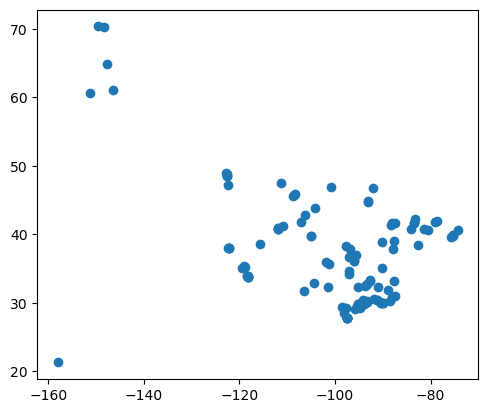

In [47]:
petro_trimmed.plot()

In [48]:
petro_trimmed.query("State == 'Hawaii'")

,Corp,Site,State,Latitude,Longitude,geometry
82,PAR PETROLEUM INC,KAPOLEI,Hawaii,21.303769,-158.0914,POINT (-158.0914 21.30377)


<Axes: >

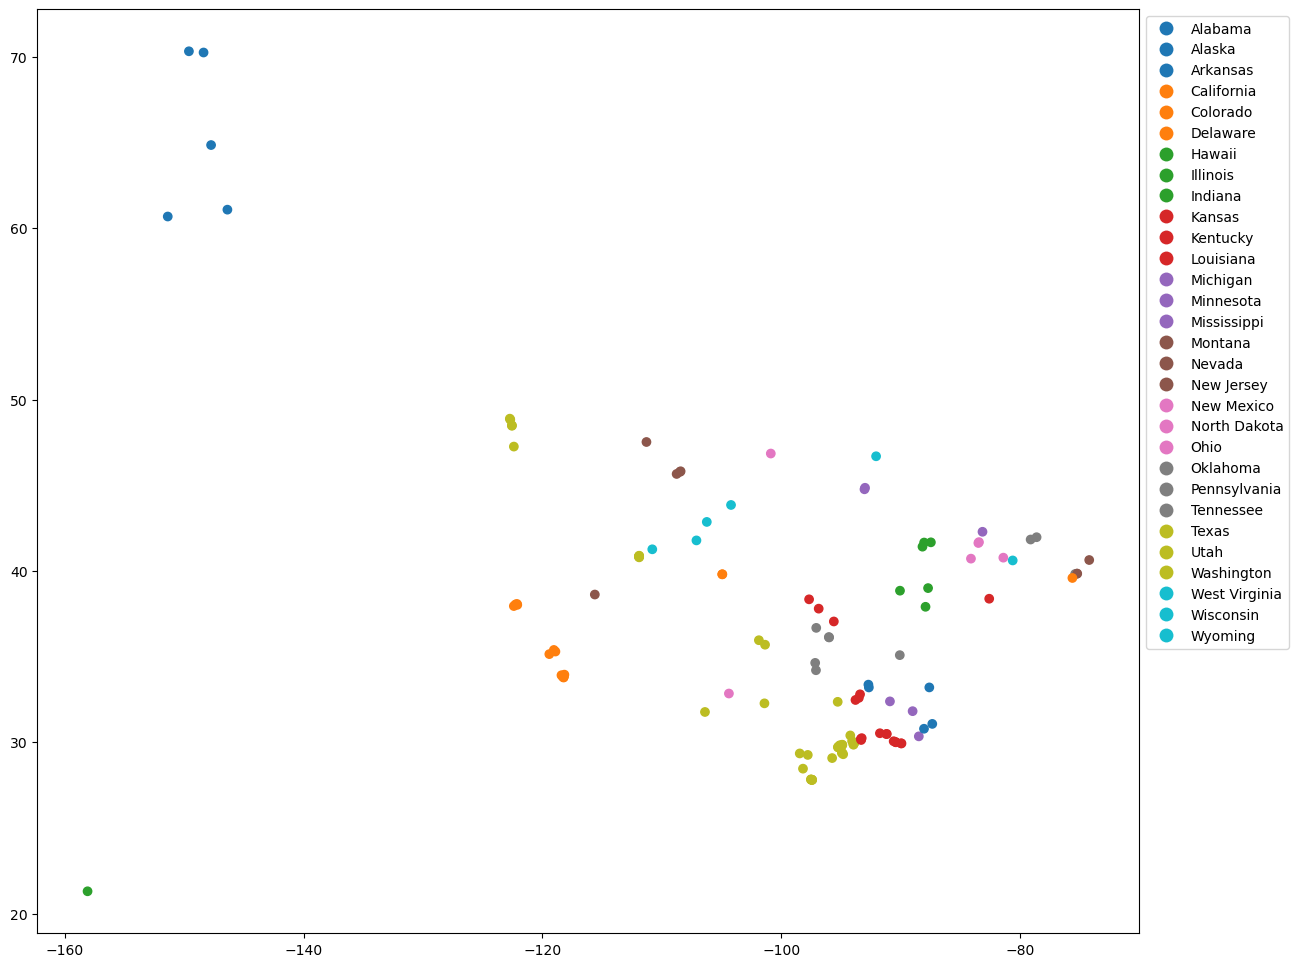

In [50]:
petro_trimmed.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'State',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [51]:
#so now I will attempt to plot this onto a US map

In [52]:
import folium

In [55]:
m = folium.Map()
m

In [57]:
#getting average latitude and longitudes
latitude = petro_trimmed.Latitude.mean()
latitude

np.float64(36.72164592424242)

In [58]:
longitude = petro_trimmed.Longitude.mean()
longitude

np.float64(-100.80649068181818)

In [59]:
m = folium.Map(location=[latitude,longitude])
m

In [60]:
#looks like we are centered between Beaver, Hooker, and Liberal, Oklahoma

In [62]:
for index, row in petro_trimmed.iterrows():
    print(row.State, row.Latitude, row.Longitude)

Texas 29.96046 -93.88847
Texas 32.270992 -101.415073
Kentucky 38.376602 -82.596408
Ohio 40.772929 -81.413878
Minnesota 44.851007 -92.994345
California 33.818578 -118.236677
Washington 48.884624 -122.734766
Alaska 70.324832 -149.604069
Alaska 70.253586 -148.37813
Louisiana 32.59107 -93.511874
Louisiana 32.798531 -93.411128
Kansas 38.341628 -97.67768
Montana 45.658374 -108.7681
California 33.911422 -118.410994
California 37.94978 -122.398665
Texas 31.767512 -106.395613
Utah 40.824744 -111.923936
Mississippi 30.344744 -88.489914
Texas 32.360432 -95.281964
Texas 29.721442 -95.206799
Utah 40.867508 -111.910603
Texas 29.347637 -98.459995
Mississippi 32.385998 -90.907845
Louisiana 30.486272 -91.169797
Montana 45.814531 -108.434778
Texas 29.761431 -94.976798
California 38.072007 -122.138319
Kansas 37.049525 -95.605823
Utah 40.838556 -111.920665
Oklahoma 34.632945 -97.167756
New Mexico 32.844821 -104.390979
Montana 47.523212 -111.295316
Alabama 33.200487 -87.611011
California 33.798301 -118.236

In [63]:
#creating folium marker for each row in the dataframe

In [64]:
for index, row in petro_trimmed.iterrows():
    folium.Marker([row.Latitude, row.Longitude], popup=row.Corp, tooltip=row.Corp).add_to(m)
m

In [65]:
#so now I have a map of the petroleum refineries in the US with labeled corporation names

In [66]:
#going to add color codes according to corporation

In [67]:
petro_trimmed['color'] = ''

In [68]:
petro_trimmed.head()

,Corp,Site,State,Latitude,Longitude,geometry,color
0,TOTALENERGIES SE,PORT ARTHUR,Texas,29.960460,-93.888470,POINT (-93.88847 29.96046),
1,DELEK GROUP LTD,BIG SPRING,Texas,32.270992,-101.415073,POINT (-101.41507 32.27099),
2,MARATHON PETROLEUM CORP,CATLETTSBURG,Kentucky,38.376602,-82.596408,POINT (-82.59641 38.3766),
3,MARATHON PETROLEUM CORP,CANTON,Ohio,40.772929,-81.413878,POINT (-81.41388 40.77293),
4,MARATHON PETROLEUM CORP,SAINT PAUL,Minnesota,44.851007,-92.994345,POINT (-92.99435 44.85101),


In [69]:
petro_trimmed.Corp.unique()

array(['TOTALENERGIES SE', 'DELEK GROUP LTD', 'MARATHON PETROLEUM CORP',
       'BP PLC', 'CONOCOPHILLIPS', 'HILCORP ENERGY CO',
       'CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.', 'CHS INC',
       'CHEVRON CORP', 'SILVER EAGLE REFINING INC',
       'STARLIGHT RELATIVITY ACQUISITION CO', 'ERGON INC',
       'EXXON MOBIL CORP', 'PAR PETROLEUM INC', 'VALERO ENERGY CORP',
       'CVR ENERGY', 'FJ MANAGEMENT INC', 'HF SINCLAIR CORP',
       'HUNT CONSLD INC', 'KERN OIL & REFINING CO', 'KOCH INDUSTRIES INC',
       'VERTEX ENERGY LP', 'PBF ENERGY CO LLC',
       'CENOVUS MARKETING (USA) INC', 'WRB REFINING LP',
       'PHILLIPS 66 COMPANY', 'PLACID OIL CO',
       'SAN JOAQUIN REFINING CO INC', 'SHELL PLC', 'DELTA AIR LINES INC',
       'SUNCOR ENERGY INC', 'AMERICAN REFINING GROUP INC',
       'FORELAND REFINING CORP', 'COUNTRYMARK COOP INC',
       'MARTIN RESOURCE MANAGEMENT GRP', 'PEMEX', 'ACCESS INDUSTRIES',
       'ARCTIC SLOPE REGIONAL CORP', 'PDV AMERICA INC', 'SAUDI ARAMCO',
     

In [75]:
#I have a lot of categories here, but I am unsure how to do this other than manually and just for California

In [78]:
#my attempt to narrow this down to CA
california_corps = petro_trimmed.loc[petro_trimmed['State'] == 'California', 'Corp'].unique()
print (california_corps)

['MARATHON PETROLEUM CORP' 'CHEVRON CORP' 'VALERO ENERGY CORP'
 'KERN OIL & REFINING CO' 'PBF ENERGY CO LLC'
 'SAN JOAQUIN REFINING CO INC' 'PHILLIPS 66 COMPANY' 'WORLD OIL CO'
 'TALLEY ASPHALT PRODUCTS INC']


In [79]:
#I am also going to narrow my map on CA

In [82]:
petro_california = petro_trimmed[petro_trimmed['State'] == 'California']
print(petro_california)

                            Corp                      Site       State  \
5        MARATHON PETROLEUM CORP                    CARSON  California   
13                  CHEVRON CORP                EL SEGUNDO  California   
14                  CHEVRON CORP                  RICHMOND  California   
26            VALERO ENERGY CORP                   BENICIA  California   
33            VALERO ENERGY CORP  WILMINGTON ASPHALT PLANT  California   
34        KERN OIL & REFINING CO               BAKERSFIELD  California   
39            VALERO ENERGY CORP       WILMINGTON REFINERY  California   
43             PBF ENERGY CO LLC                  TORRANCE  California   
54   SAN JOAQUIN REFINING CO INC               BAKERSFIELD  California   
58             PBF ENERGY CO LLC                  MARTINEZ  California   
76           PHILLIPS 66 COMPANY                     RODEO  California   
77           PHILLIPS 66 COMPANY                WILMINGTON  California   
118                 WORLD OIL CO      

In [85]:
petro_california

,Corp,Site,State,Latitude,Longitude,geometry,color
5,MARATHON PETROLEUM CORP,CARSON,California,33.818578,-118.236677,POINT (-118.23668 33.81858),
13,CHEVRON CORP,EL SEGUNDO,California,33.911422,-118.410994,POINT (-118.41099 33.91142),
14,CHEVRON CORP,RICHMOND,California,37.949780,-122.398665,POINT (-122.39867 37.94978),
26,VALERO ENERGY CORP,BENICIA,California,38.072007,-122.138319,POINT (-122.13832 38.07201),
33,VALERO ENERGY CORP,WILMINGTON ASPHALT PLANT,California,33.798301,-118.236861,POINT (-118.23686 33.7983),
34,KERN OIL & REFINING CO,BAKERSFIELD,California,35.294719,-118.917953,POINT (-118.91795 35.29472),
39,VALERO ENERGY CORP,WILMINGTON REFINERY,California,33.779055,-118.233663,POINT (-118.23366 33.77905),
43,PBF ENERGY CO LLC,TORRANCE,California,33.853208,-118.332317,POINT (-118.33232 33.85321),
54,SAN JOAQUIN REFINING CO INC,BAKERSFIELD,California,35.387330,-119.047922,POINT (-119.04792 35.38733),
58,PBF ENERGY CO LLC,MARTINEZ,California,38.019952,-122.111017,POINT (-122.11102 38.01995),


In [86]:
#now I will center the map on these

<Axes: >

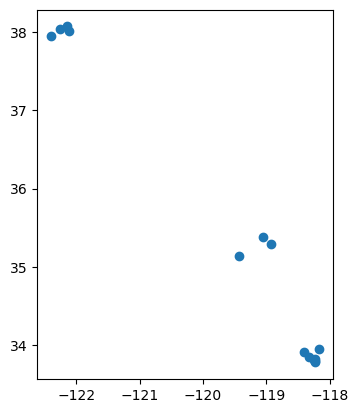

In [87]:
petro_california.plot()

In [88]:
petro_california.geometry

5      POINT (-118.23668 33.81858)
13     POINT (-118.41099 33.91142)
14     POINT (-122.39867 37.94978)
26     POINT (-122.13832 38.07201)
33      POINT (-118.23686 33.7983)
34     POINT (-118.91795 35.29472)
39     POINT (-118.23366 33.77905)
43     POINT (-118.33232 33.85321)
54     POINT (-119.04792 35.38733)
58     POINT (-122.11102 38.01995)
76     POINT (-122.25563 38.04347)
77     POINT (-118.24347 33.81086)
118    POINT (-118.16665 33.94637)
128    POINT (-119.42754 35.14491)
Name: geometry, dtype: geometry

<Axes: >

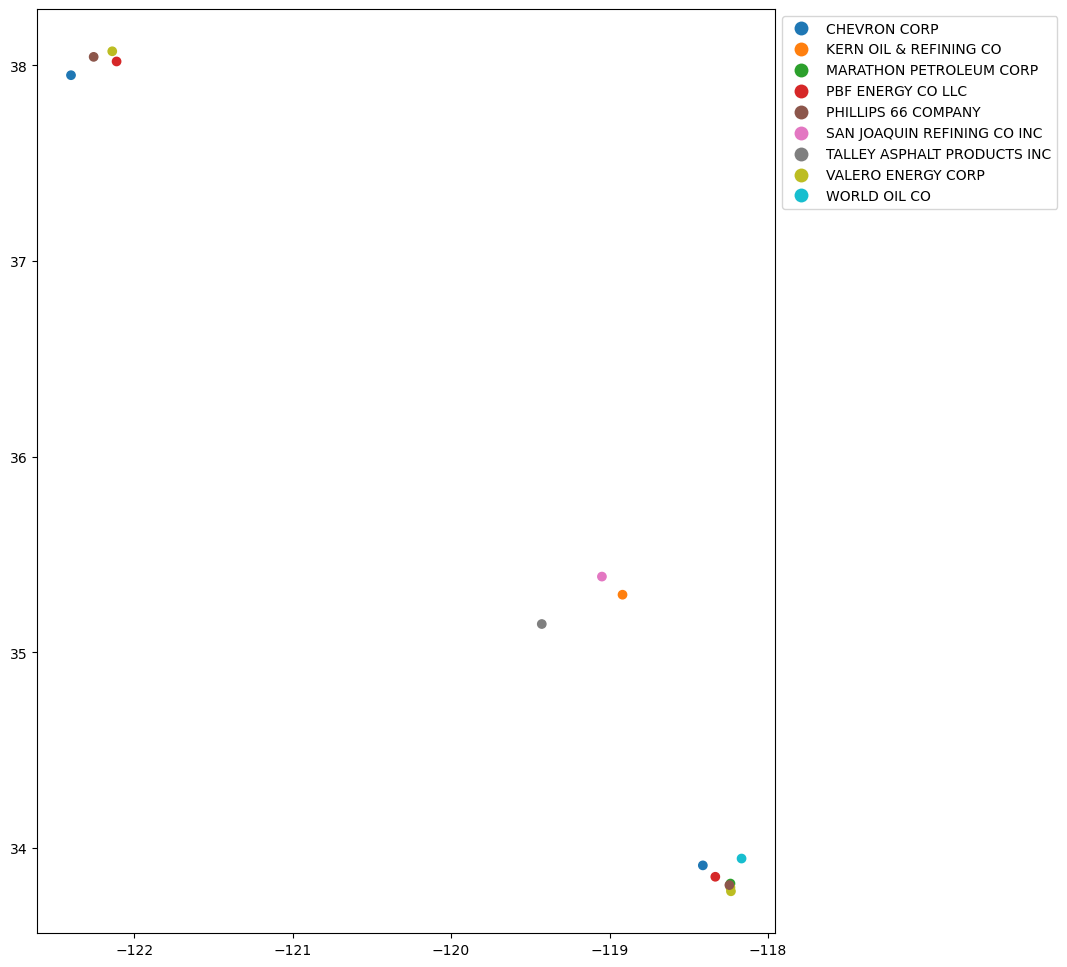

In [89]:
petro_california.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'Corp',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [90]:
m

In [91]:
m_ca = folium.Map()
m_ca

In [92]:
#created a new folium map for my CA map

In [95]:
latitude_ca = petro_california.Latitude.mean()
latitude_ca

np.float64(35.344997428571425)

In [96]:
longitude_ca = petro_california.Longitude.mean()
longitude_ca

np.float64(-119.58269142857144)

In [98]:
m_ca = folium.Map(location=[latitude_ca,longitude_ca])

In [118]:
m_ca

In [100]:
for index, row in petro_california.iterrows():
    print(row.Corp, row.Latitude, row.Longitude)

MARATHON PETROLEUM CORP 33.818578 -118.236677
CHEVRON CORP 33.911422 -118.410994
CHEVRON CORP 37.94978 -122.398665
VALERO ENERGY CORP 38.072007 -122.138319
VALERO ENERGY CORP 33.798301 -118.236861
KERN OIL & REFINING CO 35.294719 -118.917953
VALERO ENERGY CORP 33.779055 -118.233663
PBF ENERGY CO LLC 33.853208 -118.332317
SAN JOAQUIN REFINING CO INC 35.38733 -119.047922
PBF ENERGY CO LLC 38.019952 -122.111017
PHILLIPS 66 COMPANY 38.043474 -122.255632
PHILLIPS 66 COMPANY 33.810856 -118.243473
WORLD OIL CO 33.946372 -118.166647
TALLEY ASPHALT PRODUCTS INC 35.14491 -119.42754


In [101]:
for index, row in petro_california.iterrows(): #adding marker code
    folium.Marker([row.Latitude, row.Longitude], popup=row.Corp, tooltip=row.Corp).add_to(m_ca)
m_ca

In [102]:
#checking to see if the color row is still there
petro_california.head

<bound method NDFrame.head of                             Corp                      Site       State  \
5        MARATHON PETROLEUM CORP                    CARSON  California   
13                  CHEVRON CORP                EL SEGUNDO  California   
14                  CHEVRON CORP                  RICHMOND  California   
26            VALERO ENERGY CORP                   BENICIA  California   
33            VALERO ENERGY CORP  WILMINGTON ASPHALT PLANT  California   
34        KERN OIL & REFINING CO               BAKERSFIELD  California   
39            VALERO ENERGY CORP       WILMINGTON REFINERY  California   
43             PBF ENERGY CO LLC                  TORRANCE  California   
54   SAN JOAQUIN REFINING CO INC               BAKERSFIELD  California   
58             PBF ENERGY CO LLC                  MARTINEZ  California   
76           PHILLIPS 66 COMPANY                     RODEO  California   
77           PHILLIPS 66 COMPANY                WILMINGTON  California   
118     

In [103]:
#yes, it is

In [104]:
#going to add colors for each corporation

In [105]:
petro_california.loc[petro_california['Corp'] == 'MARATHON PETROLEUM CORP', 'color'] = 'blue'

In [106]:
petro_california.loc[petro_california['Corp'] == 'CHEVRON CORP', 'color'] = 'red'
petro_california.loc[petro_california['Corp'] == 'VALERO ENERGY CORP', 'color'] = 'green'
petro_california.loc[petro_california['Corp'] == 'KERN OIL & REFINING CO', 'color'] = 'purple'
petro_california.loc[petro_california['Corp'] == 'PBF ENERGY CO LLC', 'color'] = 'darkblue'
petro_california.loc[petro_california['Corp'] == 'SAN JOAQUIN REFINING CO INC', 'color'] = 'darkpurple'
petro_california.loc[petro_california['Corp'] == 'PHILLIPS 66 COMPANY', 'color'] = 'orange'
petro_california.loc[petro_california['Corp'] == 'WORLD OIL CO', 'color'] = 'beige'
petro_california.loc[petro_california['Corp'] == 'TALLEY ASPHALT PRODUCTS INC', 'color'] = 'cadetblue'

In [107]:
petro_california

,Corp,Site,State,Latitude,Longitude,geometry,color
5,MARATHON PETROLEUM CORP,CARSON,California,33.818578,-118.236677,POINT (-118.23668 33.81858),blue
13,CHEVRON CORP,EL SEGUNDO,California,33.911422,-118.410994,POINT (-118.41099 33.91142),red
14,CHEVRON CORP,RICHMOND,California,37.949780,-122.398665,POINT (-122.39867 37.94978),red
26,VALERO ENERGY CORP,BENICIA,California,38.072007,-122.138319,POINT (-122.13832 38.07201),green
33,VALERO ENERGY CORP,WILMINGTON ASPHALT PLANT,California,33.798301,-118.236861,POINT (-118.23686 33.7983),green
34,KERN OIL & REFINING CO,BAKERSFIELD,California,35.294719,-118.917953,POINT (-118.91795 35.29472),purple
39,VALERO ENERGY CORP,WILMINGTON REFINERY,California,33.779055,-118.233663,POINT (-118.23366 33.77905),green
43,PBF ENERGY CO LLC,TORRANCE,California,33.853208,-118.332317,POINT (-118.33232 33.85321),darkblue
54,SAN JOAQUIN REFINING CO INC,BAKERSFIELD,California,35.387330,-119.047922,POINT (-119.04792 35.38733),darkpurple
58,PBF ENERGY CO LLC,MARTINEZ,California,38.019952,-122.111017,POINT (-122.11102 38.01995),darkblue


In [108]:
import xyzservices.providers as xyz

In [116]:
m_ca = folium.Map(
    location=[latitude, longitude],
    tiles='CartoDB Positron',  # Corrected tiles name
    zoom_start=10,
    attr="Map data @ OpenStreetMap contributors"
)

In [117]:
# add the refineries with color icons
for index, row in petro_california.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude,row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_ca)

# show the map
m_ca

In [119]:
# Calculate the average latitude and longitude
avg_latitude = petro_california['Latitude'].mean()
avg_longitude = petro_california['Longitude'].mean()

# Create the map centered at the calculated averages
m_ca = folium.Map(
    location=[avg_latitude, avg_longitude], 
    tiles='CartoDB Positron', 
    zoom_start=10, 
    attr="Map data @ OpenStreetMap contributors"
)

# Add the refineries with colored icons
for index, row in petro_california.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude, row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_ca)

# Show the map
m_ca

In [120]:
#okay, now for TX and LA (refer to 78 for beginning of steps)

In [121]:
#my attempt to narrow this down to TX and LA
tx_corps = petro_trimmed.loc[petro_trimmed['State'] == 'Texas', 'Corp'].unique()
print (tx_corps)

['TOTALENERGIES SE' 'DELEK GROUP LTD' 'MARATHON PETROLEUM CORP'
 'CHEVRON CORP' 'STARLIGHT RELATIVITY ACQUISITION CO' 'EXXON MOBIL CORP'
 'KOCH INDUSTRIES INC' 'WRB REFINING LP' 'PHILLIPS 66 COMPANY'
 'VALERO ENERGY CORP' 'PEMEX' 'ACCESS INDUSTRIES' 'PDV AMERICA INC'
 'SAUDI ARAMCO' 'TRECORA HYDROCARBONS LLC' 'BLUE DOLPHIN ENERGY CO'
 'KINDER MORGAN ENERGY PTNRS LP' 'PETROMAX REFINING CO LLC'
 'BUCKEYE PARTNERS LP' 'ONEOK INC' 'HARTREE PARTNERS LP'
 'TEXAS INTL TERMINALS' 'ENTERPRISE PRODUCTS PTNRS LP'
 'TARGA RESOURCES INC']


In [122]:
petro_tx = petro_trimmed[petro_trimmed['State'] == 'Texas']
print(petro_tx)

                                    Corp                 Site  State  \
0                       TOTALENERGIES SE          PORT ARTHUR  Texas   
1                        DELEK GROUP LTD           BIG SPRING  Texas   
15               MARATHON PETROLEUM CORP              EL PASO  Texas   
18                       DELEK GROUP LTD                TYLER  Texas   
19                          CHEVRON CORP             PASADENA  Texas   
21   STARLIGHT RELATIVITY ACQUISITION CO          SAN ANTONIO  Texas   
25                      EXXON MOBIL CORP              BAYTOWN  Texas   
36                   KOCH INDUSTRIES INC  CORPUS CHRISTI WEST  Texas   
37                   KOCH INDUSTRIES INC  CORPUS CHRISTI EAST  Texas   
42                      EXXON MOBIL CORP             BEAUMONT  Texas   
49                       WRB REFINING LP               BORGER  Texas   
50                   PHILLIPS 66 COMPANY               SWEENY  Texas   
63               MARATHON PETROLEUM CORP        GALVESTON BAY  T

In [123]:
la_corps = petro_trimmed.loc[petro_trimmed['State'] == 'Louisiana', 'Corp'].unique()
print (la_corps)

['CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.' 'EXXON MOBIL CORP'
 'PBF ENERGY CO LLC' 'VALERO ENERGY CORP' 'PLACID OIL CO' 'SHELL PLC'
 'PHILLIPS 66 COMPANY' 'PDV AMERICA INC' 'DELEK GROUP LTD'
 'TRANSWORLD OIL USA INC' 'MARATHON PETROLEUM CORP' 'EXCEL PARALUBES']


In [124]:
petro_la = petro_trimmed[petro_trimmed['State'] == 'Louisiana']
print(petro_la)

                                          Corp           Site      State  \
9    CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.      PRINCETON  Louisiana   
10   CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.  COTTON VALLEY  Louisiana   
23                            EXXON MOBIL CORP    BATON ROUGE  Louisiana   
45                           PBF ENERGY CO LLC      CHALMETTE  Louisiana   
46                          VALERO ENERGY CORP         MERAUX  Louisiana   
48   CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.     SHREVEPORT  Louisiana   
52                               PLACID OIL CO     PORT ALLEN  Louisiana   
56                                   SHELL PLC          NORCO  Louisiana   
89                         PHILLIPS 66 COMPANY       WESTLAKE  Louisiana   
97                             PDV AMERICA INC   LAKE CHARLES  Louisiana   
103                            DELEK GROUP LTD  KROTZ SPRINGS  Louisiana   
108                     TRANSWORLD OIL USA INC   LAKE CHARLES  Louisiana   
110         

<Axes: >

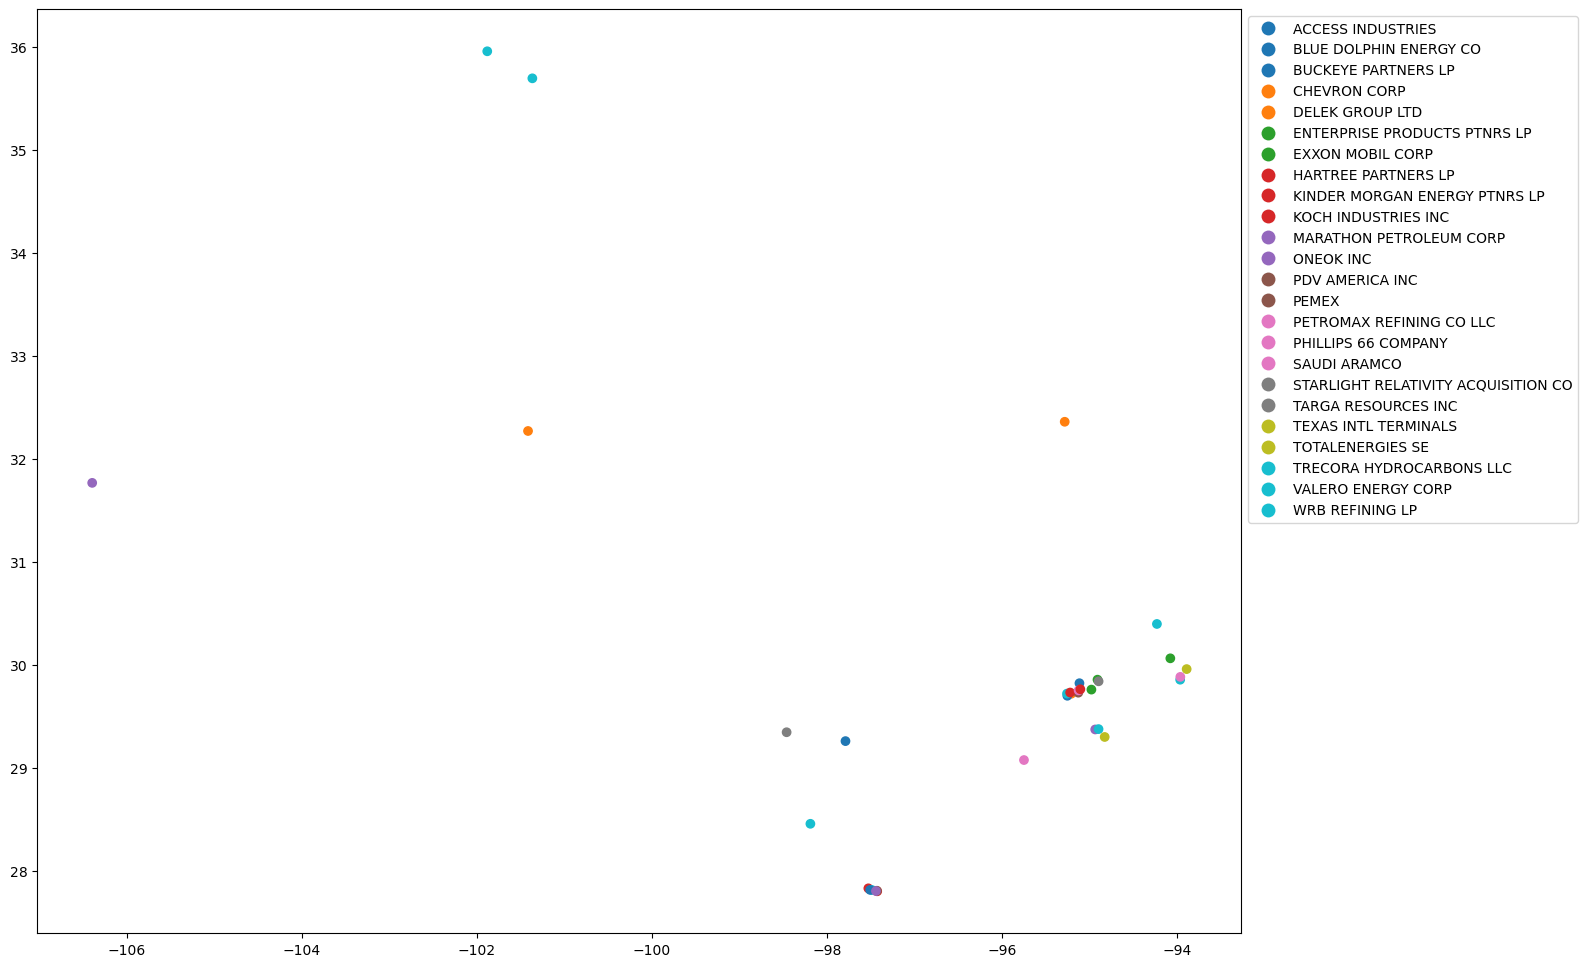

In [125]:
petro_tx.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'Corp',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

<Axes: >

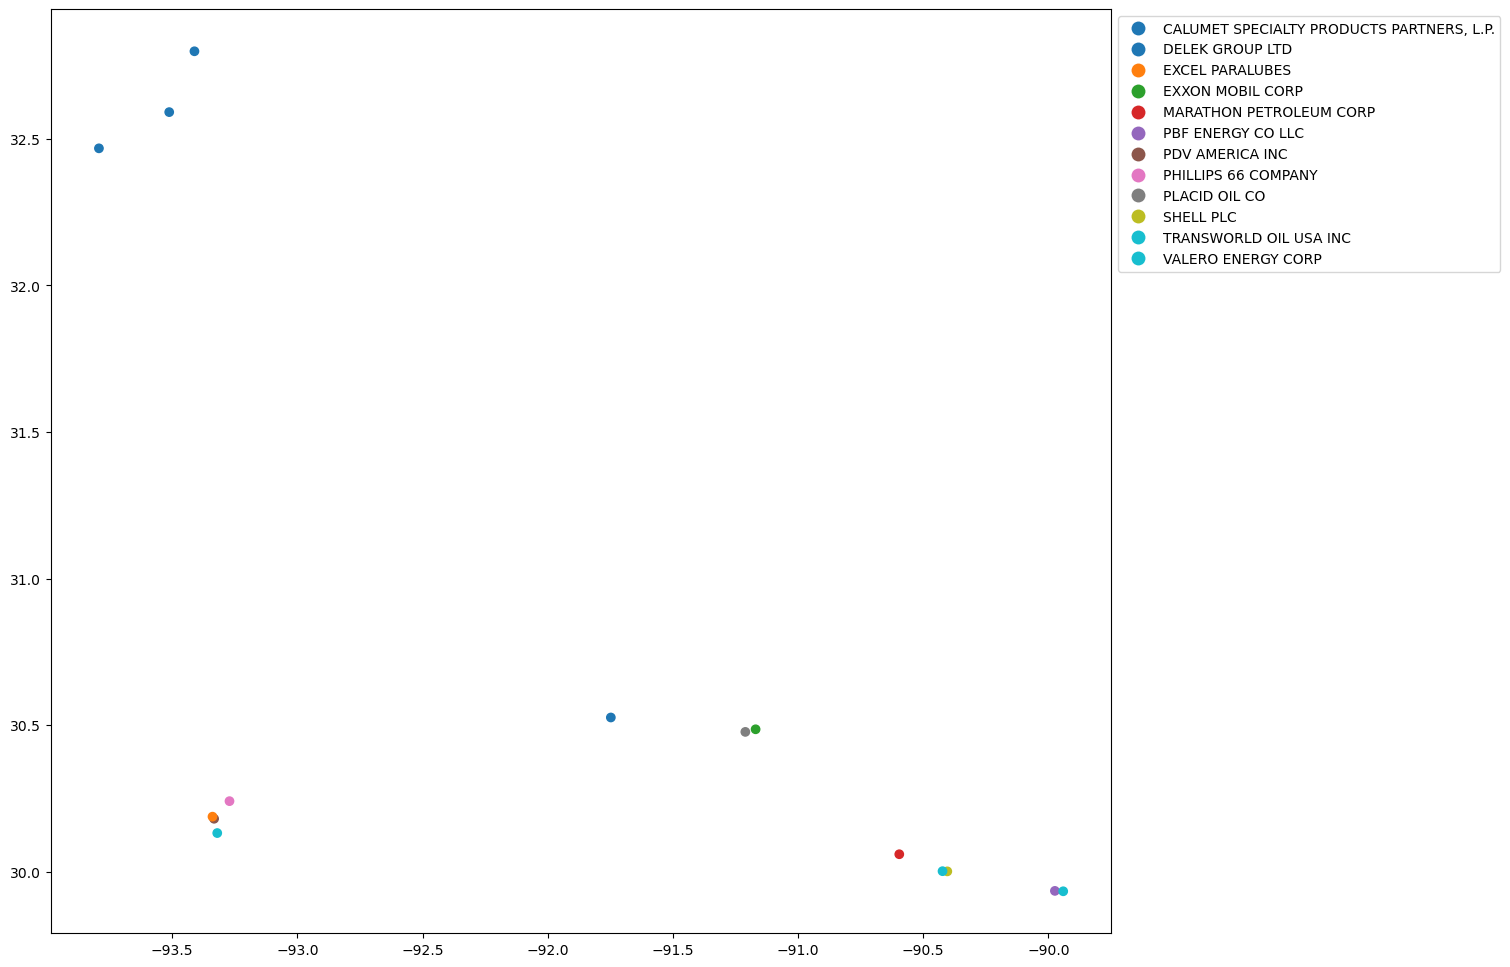

In [126]:
petro_la.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'Corp',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

In [127]:
#going to create new folium maps for TX and LA

In [128]:
latitude_tx = petro_tx.Latitude.mean()
latitude_tx

np.float64(29.903414294117653)

In [132]:
longitude_tx = petro_tx.Longitude.mean()
longitude_tx

np.float64(-96.53760832352941)

In [131]:
latitude_la = petro_la.Latitude.mean()
latitude_la

np.float64(30.668238599999995)

In [134]:
longitude_la = petro_la.Longitude.mean()
longitude_la

np.float64(-91.96305973333332)

In [135]:
m_tx = folium.Map(location=[latitude_tx,longitude_tx])
m_tx

In [136]:
m_la = folium.Map(location=[latitude_la,longitude_la])
m_la

In [137]:
for index, row in petro_tx.iterrows(): #adding marker code
    folium.Marker([row.Latitude, row.Longitude], popup=row.Corp, tooltip=row.Corp).add_to(m_tx)
m_tx

In [138]:
for index, row in petro_la.iterrows(): #adding marker code
    folium.Marker([row.Latitude, row.Longitude], popup=row.Corp, tooltip=row.Corp).add_to(m_la)
m_la

In [139]:
petro_tx.head

<bound method NDFrame.head of                                     Corp                 Site  State  \
0                       TOTALENERGIES SE          PORT ARTHUR  Texas   
1                        DELEK GROUP LTD           BIG SPRING  Texas   
15               MARATHON PETROLEUM CORP              EL PASO  Texas   
18                       DELEK GROUP LTD                TYLER  Texas   
19                          CHEVRON CORP             PASADENA  Texas   
21   STARLIGHT RELATIVITY ACQUISITION CO          SAN ANTONIO  Texas   
25                      EXXON MOBIL CORP              BAYTOWN  Texas   
36                   KOCH INDUSTRIES INC  CORPUS CHRISTI WEST  Texas   
37                   KOCH INDUSTRIES INC  CORPUS CHRISTI EAST  Texas   
42                      EXXON MOBIL CORP             BEAUMONT  Texas   
49                       WRB REFINING LP               BORGER  Texas   
50                   PHILLIPS 66 COMPANY               SWEENY  Texas   
63               MARATHON PETROLEU

In [140]:
#going to color code for TX

In [144]:
petro_tx.loc[petro_tx['Corp'] == 'TOTALENERGIES SE', 'color'] = 'red'

In [159]:
petro_tx.loc[petro_tx['Corp'] == 'DELEK GROUP LTD', 'color'] = 'blue'
petro_tx.loc[petro_tx['Corp'] == 'MARATHON PETROLEUM CORP', 'color'] = 'darkblue'
petro_tx.loc[petro_tx['Corp'] == 'CHEVRON CORP', 'color'] = 'lightblue'
petro_tx.loc[petro_tx['Corp'] == 'STARLIGHT RELATIVITY ACQUISITION CO', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'EXXON MOBIL CORP', 'color'] = 'white'
petro_tx.loc[petro_tx['Corp'] == 'KOCH INDUSTRIES INC', 'color'] = 'darkred'
petro_tx.loc[petro_tx['Corp'] == 'WRB REFINING LP', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'PHILLIPS 66 COMPANY', 'color'] = 'orange'
petro_tx.loc[petro_tx['Corp'] == 'PEMEX', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'VALERO ENERGY CORP', 'color'] = 'green'
petro_tx.loc[petro_tx['Corp'] == 'ACCESS INDUSTRIES', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'PDV AMERICA INC', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'SAUDI ARAMCO', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'TRECORA HYDROCARBONS LLC', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'BLUE DOLPHIN ENERGY CO', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'KINDER MORGAN ENERGY PTNRS LP', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'PETROMAX REFINING CO LLC', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'BUCKEYE PARTNERS LP', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'ONEOK INC', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'HARTREE PARTNERS LP', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'TEXAS INTL TERMINALS', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'ENTERPRISE PRODUCTS PTNRS LP', 'color'] = 'black'
petro_tx.loc[petro_tx['Corp'] == 'TARGA RESOURCES INC', 'color'] = 'black'

In [149]:
#I realized I had too many corps, so any corp with only one refinery is black

In [150]:
#now for LA

In [151]:
petro_la.head

<bound method NDFrame.head of                                           Corp           Site      State  \
9    CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.      PRINCETON  Louisiana   
10   CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.  COTTON VALLEY  Louisiana   
23                            EXXON MOBIL CORP    BATON ROUGE  Louisiana   
45                           PBF ENERGY CO LLC      CHALMETTE  Louisiana   
46                          VALERO ENERGY CORP         MERAUX  Louisiana   
48   CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.     SHREVEPORT  Louisiana   
52                               PLACID OIL CO     PORT ALLEN  Louisiana   
56                                   SHELL PLC          NORCO  Louisiana   
89                         PHILLIPS 66 COMPANY       WESTLAKE  Louisiana   
97                             PDV AMERICA INC   LAKE CHARLES  Louisiana   
103                            DELEK GROUP LTD  KROTZ SPRINGS  Louisiana   
108                     TRANSWORLD OIL USA INC   LAKE CHAR

In [152]:
petro_la.loc[petro_la['Corp'] == 'CALUMET SPECIALTY PRODUCTS PARTNERS, L.P.', 'color'] = 'red'
petro_la.loc[petro_la['Corp'] == 'EXXON MOBIL CORP', 'color'] = 'blue'
petro_la.loc[petro_la['Corp'] == 'PBF ENERGY CO LLC', 'color'] = 'purple'
petro_la.loc[petro_la['Corp'] == 'VALERO ENERGY CORP', 'color'] = 'green'
petro_la.loc[petro_la['Corp'] == 'PLACID OIL CO', 'color'] = 'darkred'
petro_la.loc[petro_la['Corp'] == 'SHELL PLC', 'color'] = 'lightred'
petro_la.loc[petro_la['Corp'] == 'PHILLIPS 66 COMPANY', 'color'] = 'orange'
petro_la.loc[petro_la['Corp'] == 'PDV AMERICA INC', 'color'] = 'beige'
petro_la.loc[petro_la['Corp'] == 'DELEK GROUP LTD', 'color'] = 'darkblue'
petro_la.loc[petro_la['Corp'] == 'TRANSWORLD OIL USA INC', 'color'] = 'lightblue'
petro_la.loc[petro_la['Corp'] == 'MARATHON PETROLEUM CORP', 'color'] = 'cadetblue'
petro_la.loc[petro_la['Corp'] == 'EXCEL PARALUBES', 'color'] = 'lightgreen'

In [153]:
#now to map

In [154]:
m_tx = folium.Map(
    location=[latitude, longitude],
    tiles='CartoDB Positron',  # Corrected tiles name
    zoom_start=10,
    attr="Map data @ OpenStreetMap contributors"
)

In [155]:
m_la = folium.Map(
    location=[latitude, longitude],
    tiles='CartoDB Positron',  # Corrected tiles name
    zoom_start=10,
    attr="Map data @ OpenStreetMap contributors"
)

In [160]:
# add the refineries with color icons
for index, row in petro_tx.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude,row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_tx)

# show the map
m_tx

In [157]:
# add the refineries with color icons
for index, row in petro_la.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude,row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_la)

# show the map
m_la

In [161]:
#now to recenter both maps

In [164]:
# Calculate the average latitude and longitude
avg_latitude = petro_tx['Latitude'].mean()
avg_longitude = petro_tx['Longitude'].mean()

# Create the map centered at the calculated averages
m_tx = folium.Map(
    location=[avg_latitude, avg_longitude], 
    tiles='CartoDB Positron', 
    zoom_start=7, 
    attr="Map data @ OpenStreetMap contributors"
)

# Add the refineries with colored icons
for index, row in petro_tx.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude, row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_tx)

# Show the map
m_tx

In [165]:
# Calculate the average latitude and longitude
avg_latitude = petro_la['Latitude'].mean()
avg_longitude = petro_la['Longitude'].mean()

# Create the map centered at the calculated averages
m_la = folium.Map(
    location=[avg_latitude, avg_longitude], 
    tiles='CartoDB Positron', 
    zoom_start=7, 
    attr="Map data @ OpenStreetMap contributors"
)

# Add the refineries with colored icons
for index, row in petro_la.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude, row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_la)

# Show the map
m_la

In [167]:
m_ca

In [168]:
# Calculate the average latitude and longitude
avg_latitude = petro_california['Latitude'].mean()
avg_longitude = petro_california['Longitude'].mean()

# Create the map centered at the calculated averages
m_ca = folium.Map(
    location=[avg_latitude, avg_longitude], 
    tiles='CartoDB Positron', 
    zoom_start=7, 
    attr="Map data @ OpenStreetMap contributors"
)

# Add the refineries with colored icons
for index, row in petro_california.iterrows():
    tooltip_text = row.Corp + ' Corp: ' + row.Corp
    folium.Marker(
        [row.Latitude, row.Longitude], 
        popup=row.Corp, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m_ca)

# Show the map
m_ca